<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

**1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.**

*En un puntaje/SCORE de 0 a 10, donde 10 representa la mayor libertad. El valor surge de un cálculo en base a diferentes estimadores. En la tabla algunos SCORE son promedios de otro Score; y Rank es el ranking relativo a los otros paises.*


**2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?**

*hf_promedio mundial 2017 en los 162 países = 6.89. 

Vs 2016, el nivel de libertad disminuyó ligeramente (−0.01), con 70 países aumentando sus calificaciones y 88 disminuyendo. 

vs since 2008, el nivel de libertad global también ha disminuido ligeramente (−0.07), con 61 países en el índice aumentando sus calificaciones y 79 disminuyendo.*


**3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?** 

*No, se relacionan de manera diferente la libertad de identidad. Identity es una subcategoria de pf y se presenta como:

-pf_identity_ legal: posibilidad de cambio de genero. 

-pf_identity_sex (sub sub categoria, pf_identity_sex_female, pf_identity_sex_male). Posibilidad de matrimonio entre dos individuos del mismo sexo.

-pf_identity_divorce* Posibilidad del derecho al divorcio entre mujeres y hombres. 

Inicialmente, en toda **exploración de datos** tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [228]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

In [229]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [230]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [231]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [232]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
    'ef_money_inflation'
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [233]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [234]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0,9.6
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0,8.9
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0,3.7
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0,4.9
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0,9.1
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0,9.3
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0,9.5
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0,9.2


### Dataset Latin America & the Caribbean

In [235]:
dataset_la = dataset[dataset.region == 'Latin America & the Caribbean']
dataset_la.head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0,4.9
8,2017,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.87,48.0,7.25,58.0,7.56,48.0,9.7
11,2017,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,7.59,57.0,6.45,112.0,7.02,66.0,9.1
14,2017,BLZ,Belize,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.12,74.0,6.78,85.0,6.95,68.0,9.8
17,2017,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,7.07,75.0,6.14,126.0,6.61,97.0,9.4


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 

    Resp: Proponemos compararlos teniendo en cuenta todos los valores para cada variable (10) y graficarlos para poder hacer una comparacion año tras año.
En el caso de comparar regiones, utilizo la mediana, ya que de esta forma no influyen los paises con HF extremos (por ejemplo el caso de Venezuela que esta muy por debajo de la media de Latino America.)

  3. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  
    Al comparar con un unico valor (media o mediana) y no año tras año, perdemos la evolución de las variables. 
  
  4. ¿Tiene sentido calcular la moda?

    Resp: NO, porque tenemos pocos datos para cada variable, y cada variable es numerica, lo que nos da un rango muy amplio de posibles valores.
    
    Son variables numericas continuas, no tiene sentido calcular la Moda.  

  5. ¿Cómo pueden sanearse los valores faltantes?
  6. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
   
  
  

**1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.**

Rango de Variables: Calculamos rango de variables para Latinoamerica y para todo el Mundo.


In [236]:
def var_rango(dataset):
    dict={}
    for x in range(len(dataset)):
        if x == len(dataset.columns):
            break
        col=(dataset.columns[x])
        max_v=dataset[col].max()
        if type(max_v) == str:
            continue
        min_v=dataset[col].min()
        rango=max_v-min_v
        #print((len(dataset))
        dict[col]= max_v,min_v,rango
    return pandas.DataFrame(dict, index=["Max","Min","Rango"])

### Latin America & the Caribbean

In [237]:
var_rango(dataset_la)

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
Max,2017,10.0,10.0,10.0,10.0,10.0,10.0,8.82,149.0,7.93,162.0,8.18,161.0,10.0
Min,2008,0.0,0.0,0.0,0.0,0.0,4.2,5.03,27.0,2.58,10.0,3.80,25.0,0.0
Rango,9,10.0,10.0,10.0,10.0,10.0,5.8,3.79,122.0,5.35,152.0,4.38,136.0,10.0


### World

In [238]:
var_rango(dataset)

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
Max,2017,10.0,10.0,10.0,10.0,10.0,10.0,9.56,162.0,9.11,162.0,9.12,162.0,10.0
Min,2008,0.0,0.0,0.0,0.0,0.0,0.0,2.22,1.0,2.58,1.0,3.69,1.0,0.0
Rango,9,10.0,10.0,10.0,10.0,10.0,10.0,7.34,161.0,6.53,161.0,5.43,161.0,10.0


**2. Para cada país, tenemos varias realizaciones para cada variable pf_identity y hf_score. Si queremos comparar un país con otro (1vs1), ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana?**

Creemos que la manera adecuada de comparar un país con otro (1vs1) es comparar los valores de las variable pf_identity y hf_score en un Grafico de lineas en donde se visualice los valores a lo largo del tiempo. Tambien es válido comparar un único valor entre los dos países, por ejemplo empleando una Tabla que exhiba el promedio o la moda de estos 10 años.

**3. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el *mundo* y compararla con la de *Latinoamérica y el caribe*. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
Media, Mediana y Desv Estándar pf_identity y hf_score** 

**4.¿Tiene sentido calcular la moda?**

In [239]:
def mmestd(w_dataset,l_dataset): #mmestd= Media, MEdian & STD
    lst=[]
    dict={}
    co=["pf_identity", "hf_score"]
    for i in range(len(co)):
        w_mean=w_dataset[co[i]].mean() #w_ = world
        w_median=w_dataset[co[i]].median()
        w_std=w_dataset[co[i]].std()
        w_mode=w_dataset[co[i]].mode()
        l_mean=l_dataset[co[i]].mean() #l_=latin
        l_median=l_dataset[co[i]].median()
        l_std=l_dataset[co[i]].std()
        l_mode=l_dataset[co[i]].mode()
        lst= lst + [w_mean,w_median,w_std,float(w_mode)] + [l_mean,l_median,l_std,float(l_mode)]
    #print (lst)
    dict={"World_pf_identity": lst[:4], "Latin_pf_identity":lst[4:8],"World_hf_score": lst[8:12], "Latin_hf_score": lst[12:]}
    #print(dict)
    return pandas.DataFrame(dict, index=["Media","Mediana","Desv Estandar", "Moda"])

In [240]:
mmestd(dataset,dataset_la)

,World_pf_identity,Latin_pf_identity,World_hf_score,Latin_hf_score
Media,7.280649,8.582171,6.978214,7.036977
Mediana,8.800000,10.000000,6.900000,7.020000
Desv Estandar,3.181577,1.875832,1.056239,0.634897
Moda,10.000000,10.000000,6.750000,6.720000


**Conclusiones:**
Tal como se expuso, la presentación de un único valor es más eficaz en una tabla.
La **media** de latinoamerica esta por encima de la media mundial, para ambas variables.
La **mediana** también es útil, ya que permite independizarse de los valores outliers de los extremos. En este caso vemos que la mediana de pf_identity es 10, lo que demuestra que existen paises con valores muy bajos de pf_identity que están reduciendo la **media**.
Tal como esperábamos, la **Desv Estandar** de los datos es menor en Latin. 

Por otro lado, la **moda**nos permite ver que es lo mas frecuente en los grupos. El resultado de la moda sugiere la mayoria de los paises de Latin presentan similitudes a la mayoria de los paises del resto del mundo en ambas variables.

**5.¿Cómo pueden sanearse los valores faltantes?** 

Creemos que la estrategia del NaN para los valores faltantes es válida.

**6.¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos?**


Para ayudar a la visualizacion se puede usar el gráfico de **Box-plot.**

## Outliers a nivel Mundial
### HF_SCORE

Con respecto a la variable HF_SCORE encontramos valores extremos inferior del grafico provenientes de los paises Venezuela y Syria, particularmente con un hf_score por debajo de 4. 
Pero no consideramos adecuado descartalarlos ya que son valores reales.

Text(0, 0.5, 'Human Freedom Score')

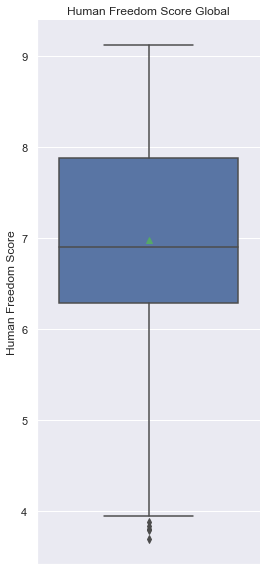

In [241]:
seaborn.set()
plt.figure(figsize=(4,10))
seaborn.boxplot(data=dataset, y='hf_score',showmeans=True)
seaborn.despine()
plt.title('Human Freedom Score Global')
plt.ylabel('Human Freedom Score')


In [242]:
hf_outliers = (dataset.hf_score < 4)
dataset[hf_outliers]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
141,2017,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,2.53,162.0,5.05,155.0,3.79,162.0,4.2
157,2017,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,2.5,4.2,5.03,149.0,2.58,162.0,3.80,161.0,0.0
303,2016,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,2.45,161.0,4.93,159.0,3.69,162.0,1.0
465,2015,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,2.79,158.0,4.87,155.0,3.83,159.0,0.0
627,2014,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,3.00,158.0,4.88,155.0,3.94,159.0,1.0
789,2013,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,3.79,156.0,3.97,156.0,3.88,157.0,0.0


### PF_IDENTITY
Realizamos el mismo análisis para la variable PF_IDENTITY, encontramos algunos paises con valor cero en esta variable, todos pertenecientes a las regiones de South Asis, Sub-Saharan Africa y principalmente en Middle East & Notrh Africa.

Text(0.5, 1.0, 'Personal Freedom Identity Global')

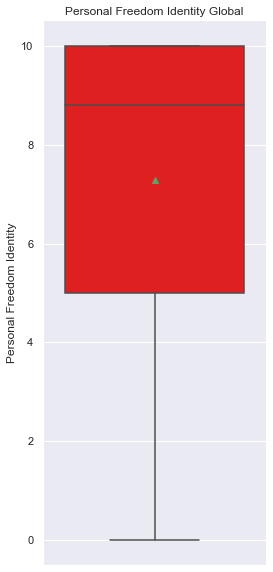

In [243]:
seaborn.set()
plt.figure(figsize=(4,10))
seaborn.boxplot(data=dataset, y='pf_identity', showmeans=True, color="Red")
seaborn.despine()
plt.ylabel('Personal Freedom Identity')
plt.title('Personal Freedom Identity Global')

In [244]:
hf_outliers = (dataset.pf_identity == 0)
dataset[hf_outliers].groupby('region').count()

,year,ISO_code,countries,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
region,,,,,,,,,,,,,,,,
Middle East & North Africa,67,67,67,0,67,67,67,67,67,67,67,67,67,67,67,67
South Asia,19,19,19,0,19,19,19,19,19,19,19,19,19,19,19,19
Sub-Saharan Africa,14,14,14,0,14,14,14,14,14,14,14,14,14,14,14,14


**6. Los outliers, ¿son globales o por grupo?**

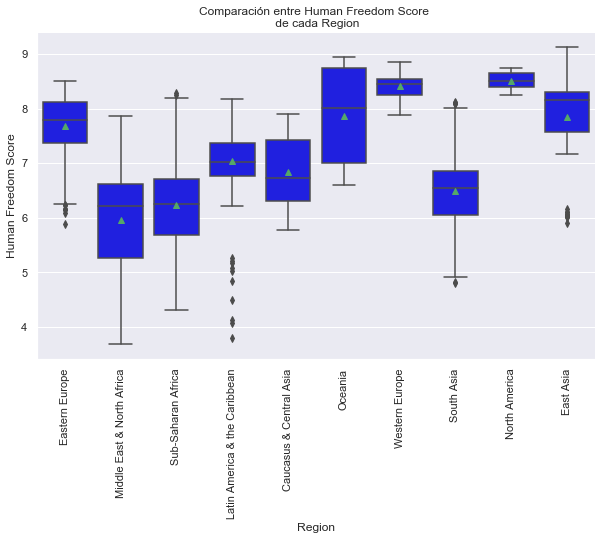

In [245]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,x='region', y='hf_score', color="Blue", showmeans=True) 
plt.ylabel('Human Freedom Score')
plt.xlabel('Region')
plt.title('Comparación entre Human Freedom Score \n de cada Region')
plt.xticks(rotation=90)
seaborn.despine()

Analizamos los valores extremos en la region de Latin&central y encontramos a **Venezuela**.

In [246]:
dataset_la_outliers = (dataset_la.hf_score < 6)
dataset_la[dataset_la_outliers]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
157,2017,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,2.5,4.2,5.03,149.0,2.58,162.0,3.80,161.0,0.0
319,2016,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,6.7,5.60,134.0,2.65,162.0,4.13,161.0,0.0
481,2015,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,6.7,5.44,138.0,2.71,159.0,4.08,158.0,0.0
643,2014,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.03,121.0,2.96,159.0,4.50,158.0,0.0
805,2013,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.67,96.0,3.01,157.0,4.84,154.0,1.9
967,2012,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.63,93.0,3.54,153.0,5.09,147.0,5.8
1129,2011,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.79,92.0,3.64,153.0,5.21,146.0,4.8
1291,2010,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.35,113.0,3.68,153.0,5.02,150.0,4.2
1453,2009,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.24,113.0,4.11,140.0,5.18,139.0,4.3
1484,2008,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.33,108.0,4.21,140.0,5.27,136.0,3.7


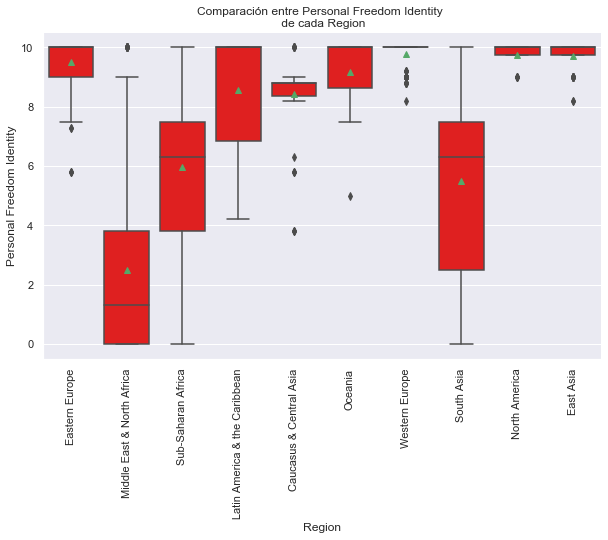

In [247]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,x='region', y='pf_identity', color="red", showmeans=True) 
plt.ylabel('Personal Freedom Identity')
plt.xlabel('Region')
plt.title('Comparación entre Personal Freedom Identity \n de cada Region')
plt.xticks(rotation=90)
seaborn.despine()

In [248]:
#Analizamos los valores extremos en la region de Latin&central y encontramos a **Venezuela** y Jamaica.
dataset_la_outliers = (dataset_la.pf_identity < 5)
dataset_la[dataset_la_outliers]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
74,2017,JAM,Jamaica,Latin America & the Caribbean,0.0,0.0,10.0,5.0,7.5,4.2,7.23,66.0,7.17,61.0,7.2,59.0,9.1
157,2017,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,2.5,4.2,5.03,149.0,2.58,162.0,3.8,161.0,0.0


**Conclusiones:**
En término de *hf_score*, en el análisis comparativos global vs regiones se encuentran valores extremos diferentes.
En el analisis global, el límite inferior de valores de *hf_score* es 4. Mientras que la región Latin&central presenta como  valores extremos a Venezuela con *hf_score* por debajo de 6, pero superior a 4.
Por lo tanto, valores outliers que se encuentran en una region, no necesariamente lo son en el análisis global. 
Existen outliers propios de cada región.

**¿Los eliminaría del conjunto de datos?** 

Depende del tipo de pregunta que querramos responder. 

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

        Mediante un relplot de Seaborn podemos ver todos los paises de latinoamerica y sus tendencias, de ahi seleccionamos los convenientes. 

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

**1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.**

Ambas fueron descendiendo con los años.

In [249]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

# seaborn.set_context(context='talk', font_scale=1.5)
seaborn.set(style='whitegrid', font_scale=1.5)

Text(0.5, 0, 'Years')

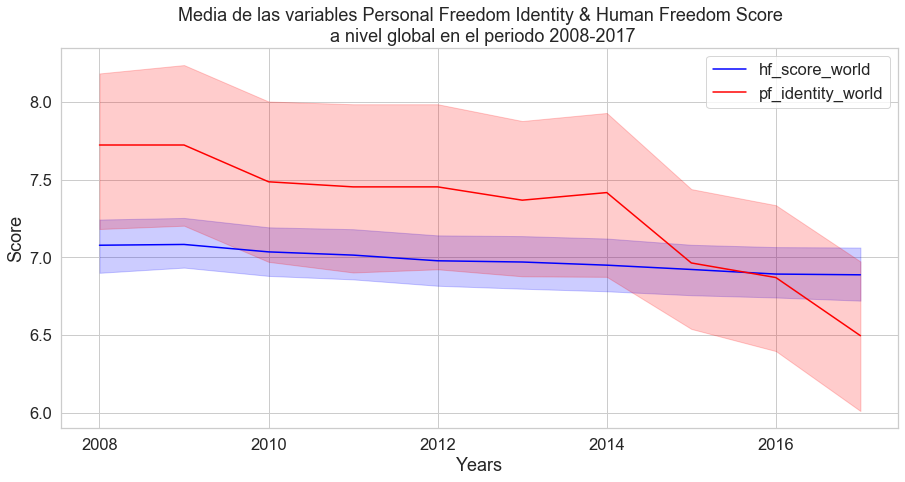

In [250]:
plt.figure(figsize=(15,7))
plt.title('Media de las variables Personal Freedom Identity & Human Freedom Score\n a nivel global en el periodo 2008-2017')
# seaborn.lineplot(data=dataset_la, x='year', y='hf_score', label='hf_score_la')
seaborn.lineplot(data=dataset, x='year', y='hf_score', label='hf_score_world', color='Blue')
# seaborn.lineplot(data=dataset_la, x='year', y='pf_identity', label='pf_identity_la')
seaborn.lineplot(data=dataset, x='year', y='pf_identity', label='pf_identity_world', color='Red')
plt.ylabel('Score')
plt.xlabel('Years')

**2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?**

### Comparamos las variables por Regiones

Text(3255.5252499999997, 0.5, 'Score')

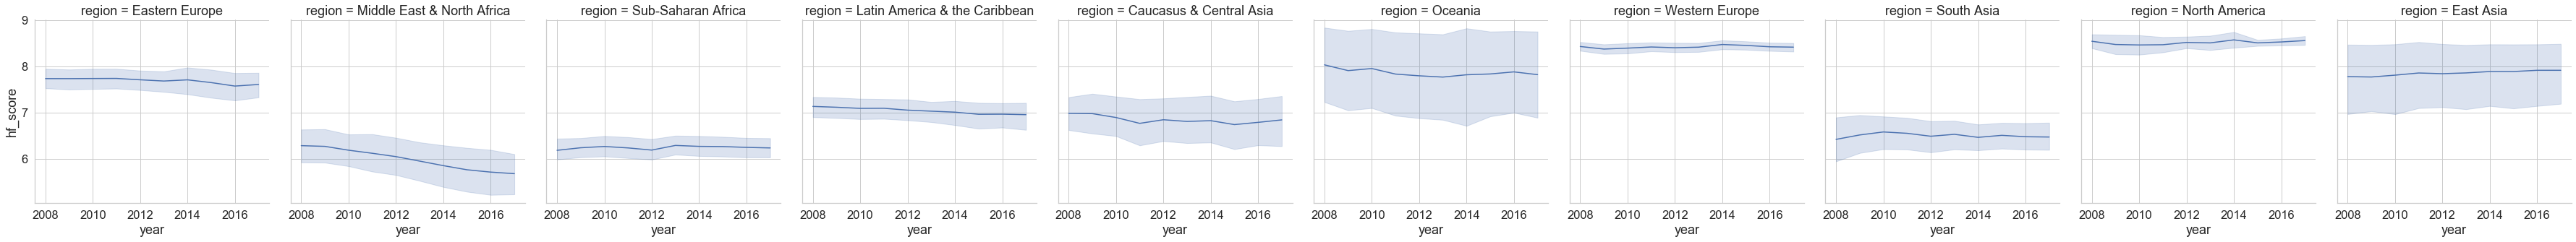

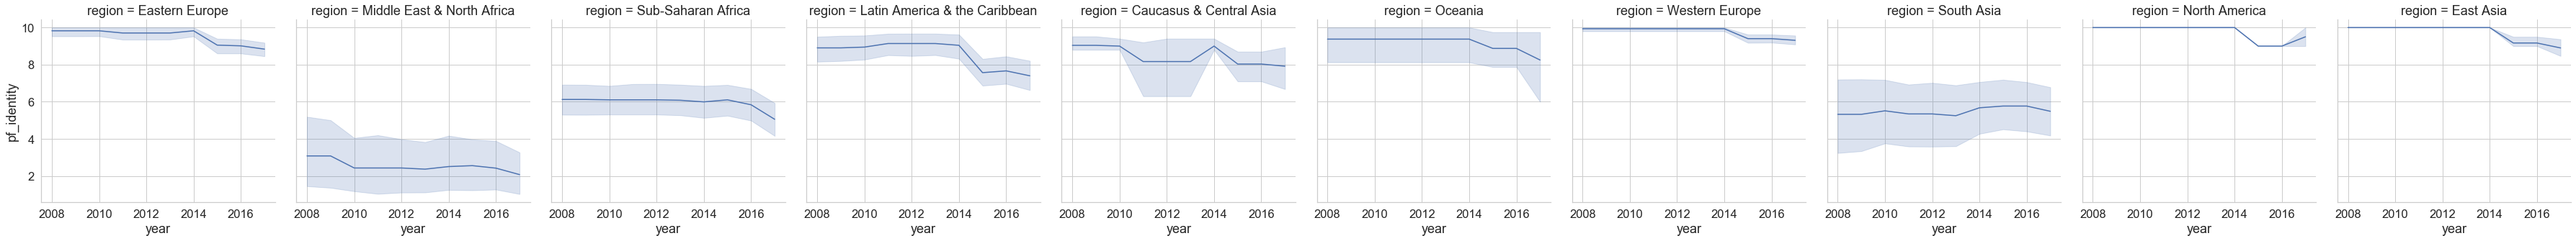

In [251]:
seaborn.relplot(x="year", y="hf_score", col="region", kind="line", data=dataset);
seaborn.relplot(x="year", y="pf_identity", col="region", kind="line", data=dataset);
plt.ylabel('Score')

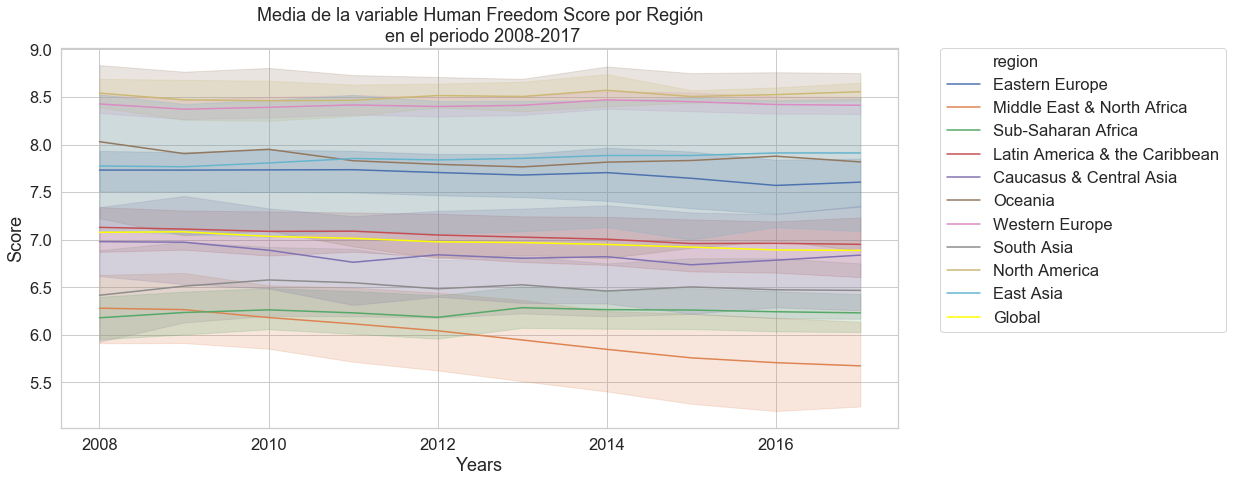

In [252]:
plt.figure(figsize=(15,7))
plt.title('Media de la variable Human Freedom Score por Región\n en el periodo 2008-2017')
seaborn.lineplot(data=dataset, x='year', y='hf_score', hue='region')
seaborn.lineplot(data=dataset, x='year', y="hf_score", color="yellow", estimator="mean", ci=None, label="Global")
plt.ylabel('Score')
plt.xlabel('Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


**Conclusión:** con la excepcion de *Middle East & North Afirca* quien muestra una marcada disminución de su Score a lo largo de los años, en las demas regiones se ve una tendencia similar a "Global".

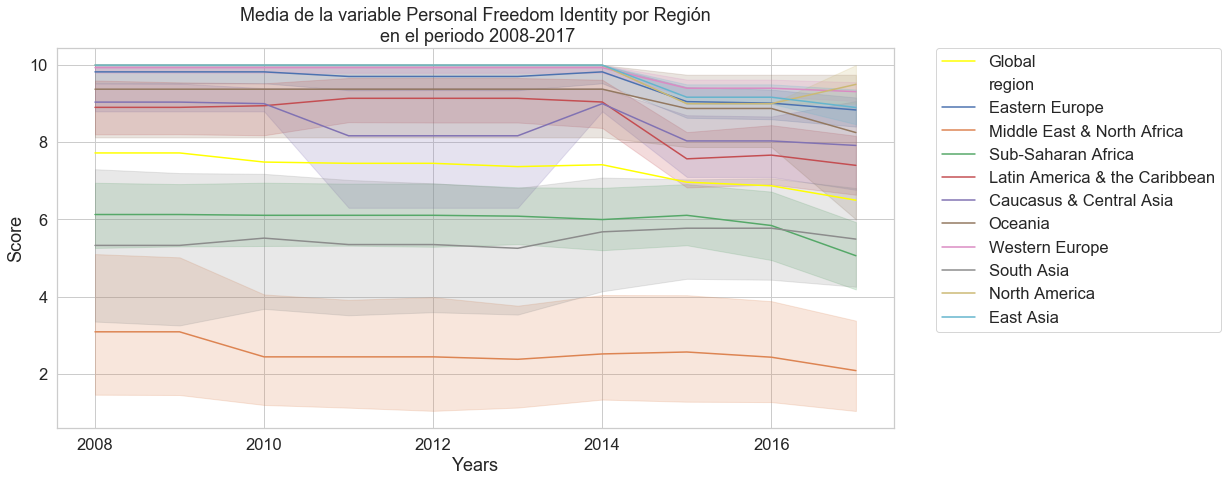

In [253]:
plt.figure(figsize=(15,7))
plt.title('Media de la variable Personal Freedom Identity por Región\n en el periodo 2008-2017')
seaborn.lineplot(data=dataset, x='year', y="pf_identity", color="yellow", estimator="mean", ci=None, label="Global")
seaborn.lineplot(data=dataset, x='year', y='pf_identity', hue='region')
plt.ylabel('Score')
plt.xlabel('Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


**Conclusión**: Con excepción de *South Asia* quien entre 2008 y 2017 mantiene su pf_Identity a lo largo de los años, en las demas regiones se ve una tendencia a disminuir tal cual se ve en el "Global".

**3.Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?**

Para seleccionar primero graficamos a todos los paises de la región, y luego de una inspeccion visual observamos que ciertos paises sufrieron una disminucion significativa en 2014. Esos son los paises que elegimos para graficar, ya que acompañan la tendencia de la region. Además graficamos ARG, para compararnos con la región.

## Media para pf_identity

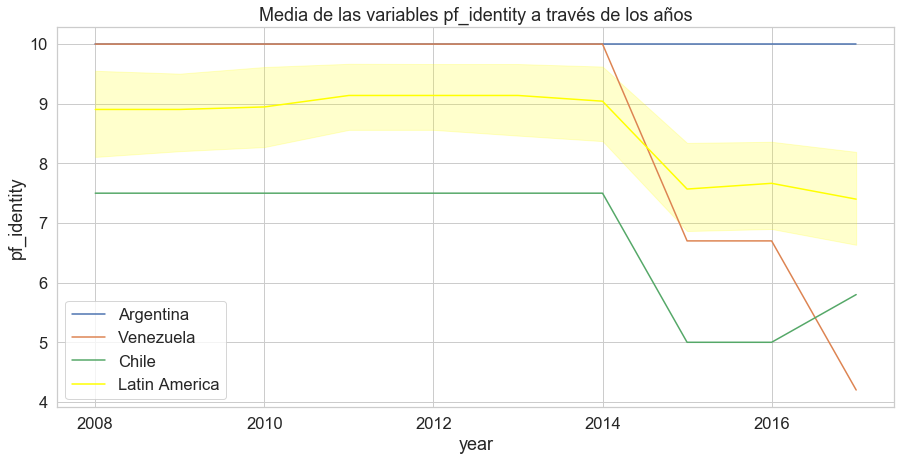

In [254]:
plt.figure(figsize=(15,7))
plt.title('Media de las variables pf_identity a través de los años')
# seaborn.lineplot(data=dataset[dataset.countries == 'Canada'], x='year', y='pf_identity', label='canada')
seaborn.lineplot(data=dataset[dataset.countries == 'Argentina'], x='year', y='pf_identity', label='Argentina')
seaborn.lineplot(data=dataset[dataset.countries == 'Venezuela'], x='year', y='pf_identity', label='Venezuela')
seaborn.lineplot(data=dataset[dataset.countries == 'Chile'], x='year', y='pf_identity', label='Chile')
# seaborn.lineplot(data=dataset_la, x='year', y='pf_identity', hue='countries')
seaborn.lineplot(data=dataset_la, x='year', y='pf_identity', label='Latin America', Color="yellow")

**3.b. Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?**

La tendencia de ef_score (amarillo) es estable a los largo de los años. Por otro lado, hf_score (azul) tiene una tendencia a la disminucion en estos 10 años. Por lo que, pf_score (linea naranja) es el responsable de esta disminucion en hf_score.
Tener en cuenta que pf_identity es uno de los componentes que dan lugar al pf_score, quien vimos que a nivel global fue disminuyendo.

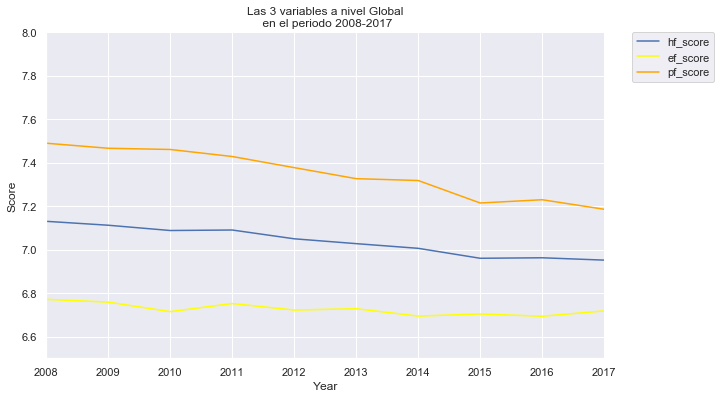

In [255]:
seaborn.set()
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset_la, x='year', y="hf_score", estimator="mean", ci=None, label="hf_score")
seaborn.lineplot(data=dataset_la, x='year', y="ef_score", color="yellow",  ci=None, label="ef_score")
seaborn.lineplot(data=dataset_la, x='year', y="pf_score", color="orange",  ci=None, label="pf_score")
plt.ylabel('Score')
plt.xlabel('Year')
plt.title('Las 3 variables a nivel Global\n en el periodo 2008-2017')
plt.xlim(2008,2017)
plt.ylim(6.5,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

## 3. Distribuciones
  **1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable?** 
  
- pf_identity presenta una distribución sesgada a la derecha.
- hf_score es mas parecida a una normal.
    
**¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?**
Depende de cual sea la pregunta a responder:
Por un lado, La region se compone de toda esa diversidad de paises, eliminar algunos sería enmascarar el fenomeno regional.
Por otro lado, por una cuestion matemática/estadistica conviene sacar los outliers para un mejor manejo de los datos.


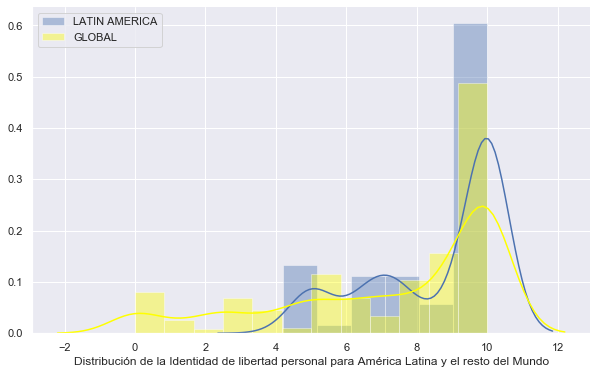

In [256]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset_la.pf_identity, label='LATIN AMERICA')
seaborn.distplot(dataset.pf_identity, label='GLOBAL', color="yellow")
plt.xlabel('Distribución de la Identidad de libertad personal para América Latina y el resto del Mundo')
plt.legend()
seaborn.despine()

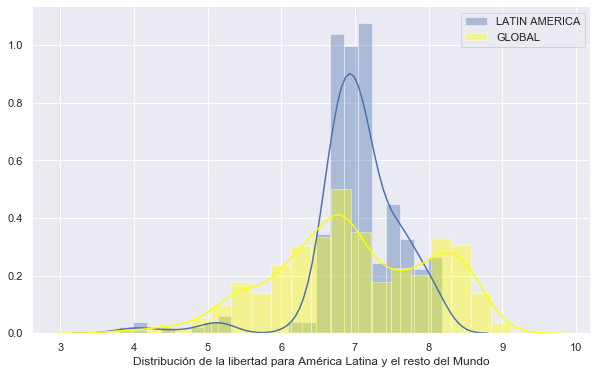

In [257]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset_la.hf_score, label='LATIN AMERICA')
seaborn.distplot(dataset.hf_score, label='GLOBAL',color="yellow")

plt.xlabel('Distribución de la libertad para América Latina y el resto del Mundo')
plt.legend()
seaborn.despine()

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



**1.¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?**
Pairplot permite observar relaciones entre las distintas variables. pf_identity ya que presenta valores discretos. Es adecuado usar pairploy ya que su documentación tiene un apartado específico para variables discretas. Por lo tanto está contemplado su uso y además permite ver las relaciones con las otras dos variables.

A nivel global vemos una relación positiva entre pf_score, ef_score y pf_identity, a mayor de una de ellas, mayor el valor de otra. 
A nivel regiones vemos que esta relacion una relación positiva entre pf_score y ef_score. Sin embargo la relacion ef_score y pf_identity se invierte en algunas regiones tal como Latin&Caribe.

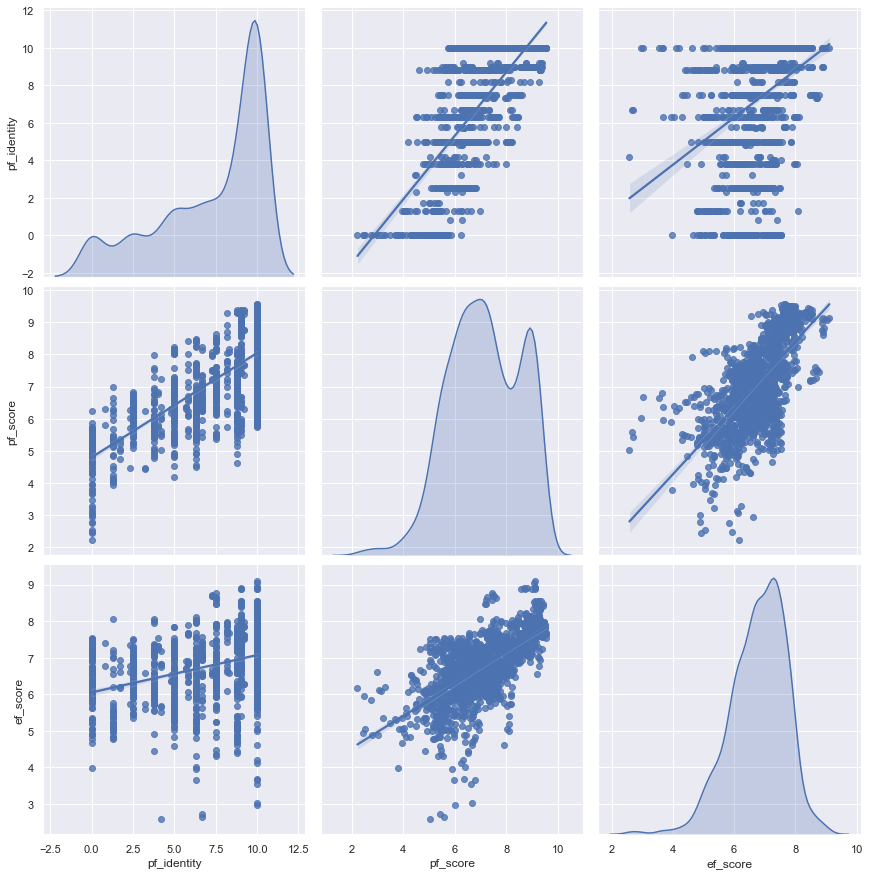

In [258]:
seaborn.pairplot(data=dataset,
                 vars=['pf_identity', 'pf_score', 'ef_score'],
                                  height=4, diag_kind="kde",kind="reg")

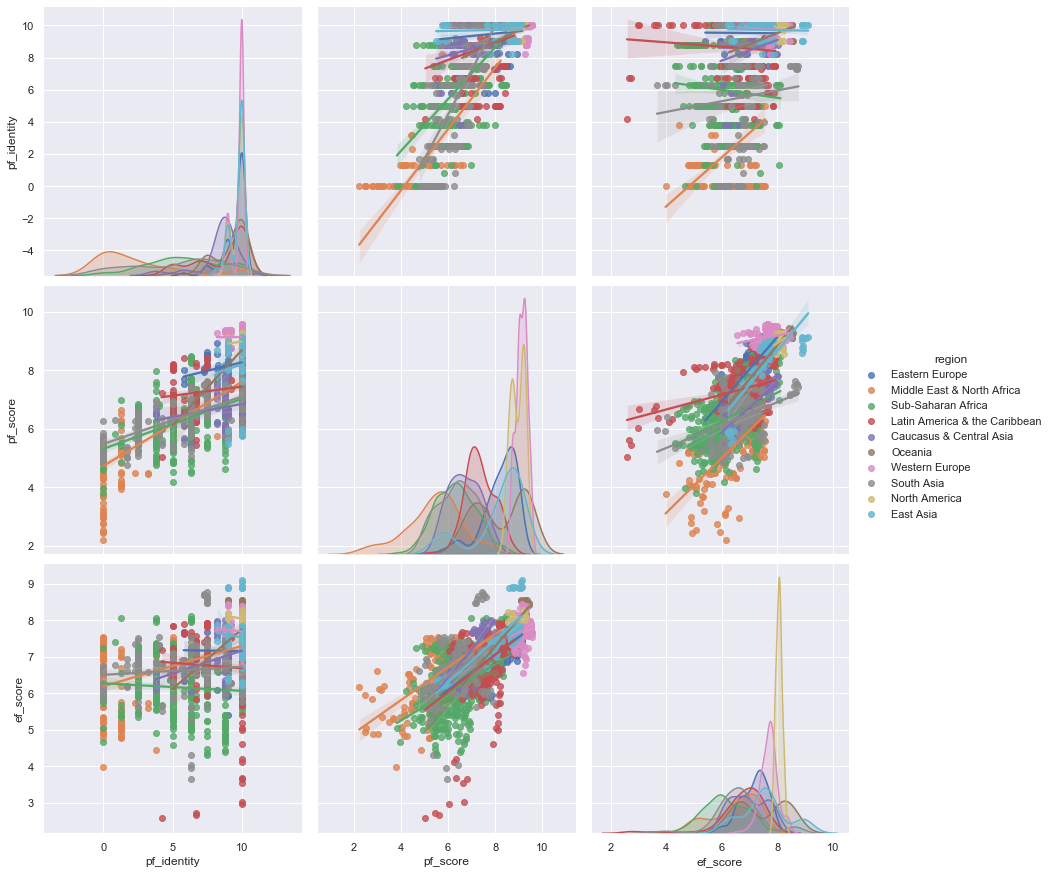

In [259]:
seaborn.pairplot(data=dataset,
                 vars=['pf_identity', 'pf_score', 'ef_score'], hue='region',
                                  height=4, diag_kind="kde",kind="reg")

**2.Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.**

Para ver correlacion es útil usar el **regplot** ya que la variable pf_identity es discreta y solo toma algunos numeros enteros entre 0 y 10. Graficamos la media y hacemos regresión lineal. Se observa una relacion proporcional entre *pf_identity y pf_score*; y entre *pf_identity y ef_score*, siendo mas marcada en la primera. Esto tiene logica ya que pf_identity es uno de los valores utilizados para calcular el pf_score.

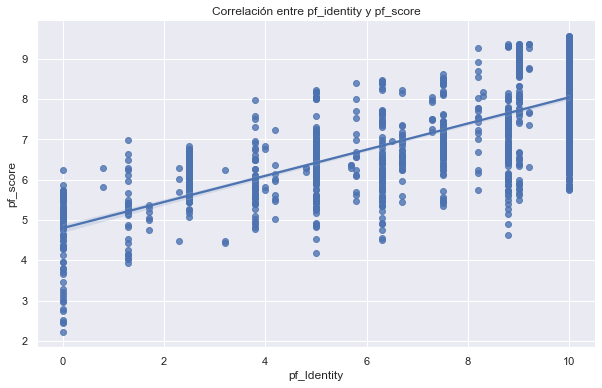

In [260]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset, 
                x='pf_identity',
                y='pf_score')
plt.xlabel('pf_Identity')
plt.ylabel('pf_score')
plt.title('Correlación entre pf_identity y pf_score')
seaborn.despine()

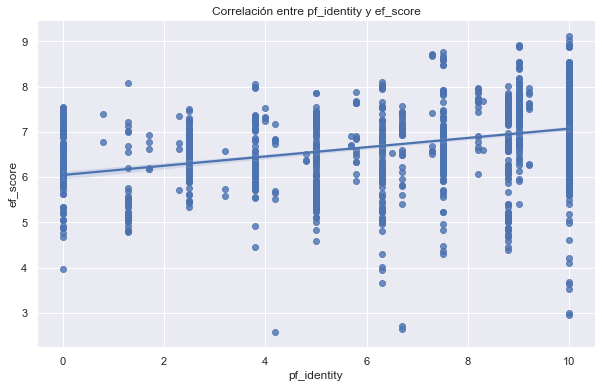

In [261]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset, x='pf_identity',
                y='ef_score')
plt.xlabel('pf_identity')
plt.ylabel('ef_score')
plt.title('Correlación entre pf_identity y ef_score')
seaborn.despine()

**3.Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores high, medium y low. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como pandas.cut o pandas.dcut. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.**

Criterio de los intervalos: 3 intervalos iguales utilizando pandas cut (por defecto)

In [262]:
segment_names=['low', 'medium', 'high']
pf_identity_segment = pandas.cut(dataset.pf_identity, bins=3, labels=segment_names)
ef_score_segment = pandas.cut(dataset.ef_score, bins=3, labels=segment_names)
pf_score_segment = pandas.cut(dataset.pf_score, bins=3, labels=segment_names)

In [263]:
data_test = dataset.copy()

In [264]:
data_test['pf_identity_segment'] = pf_identity_segment
data_test['pf_score_segment'] = pf_score_segment
data_test['ef_score_segment'] = ef_score_segment
data_test.head(3)

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation,pf_identity_segment,pf_score_segment,ef_score_segment
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0,9.6,medium,high,high
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0,8.9,low,medium,medium
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0,3.7,medium,medium,medium


**4.Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.**

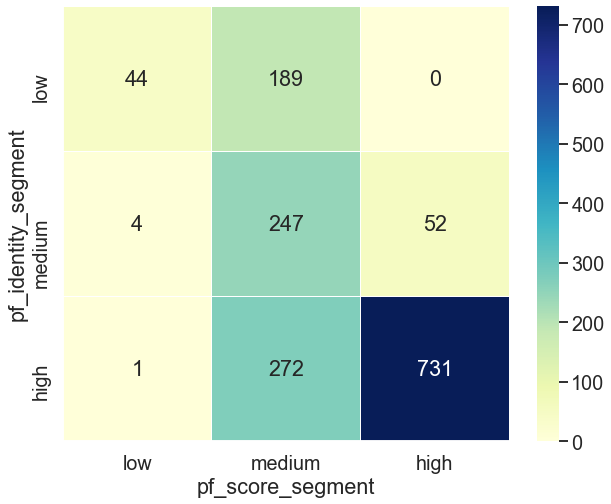

In [265]:
seaborn.set_context(context='talk', font_scale=1.2)
plt.figure(figsize=(10,8))
exp = pandas.crosstab(data_test.pf_identity_segment,data_test.pf_score_segment)
seaborn.heatmap(exp, annot=True, fmt="d", cmap='YlGnBu',linewidths=.1)
seaborn.despine()

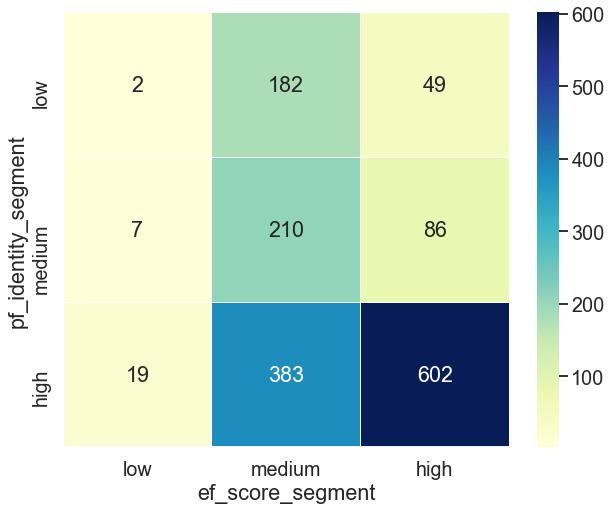

In [266]:
seaborn.set_context(context='talk', font_scale=1.2)
plt.figure(figsize=(10,8))
exp = pandas.crosstab(data_test.pf_identity_segment,data_test.ef_score_segment)
seaborn.heatmap(exp, annot=True, fmt="d", cmap='YlGnBu',linewidths=.1)
seaborn.despine()


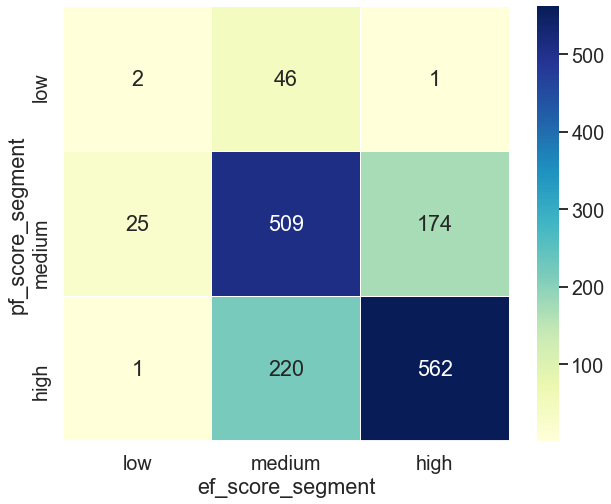

In [267]:
seaborn.set_context(context='talk', font_scale=1.2)
plt.figure(figsize=(10,8))
exp = pandas.crosstab(data_test.pf_score_segment, data_test.ef_score_segment)
seaborn.heatmap(exp, annot=True, fmt="d", cmap='YlGnBu',linewidths=.1)
seaborn.despine()


# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

### KS test para PF_IDENTITY

In [268]:
# Normalizamos la distribucion
latin_america = dataset[dataset.region == 'Latin America & the Caribbean']['pf_identity'].dropna()

normalized_latin_america=(latin_america-latin_america.mean())/latin_america.std()

stats.kstest(normalized_latin_america, 'norm')

KstestResult(statistic=0.3487708981617609, pvalue=1.489356122294589e-28)

Al realizar el KS test para Latin America & the Caribbean obtenemos un p-valor superior al estadistico por lo que **NO** contamos con evidencia suficiente para rechazar la Hipotesis Nula (que propone que se trataba de una distribucion Normal).

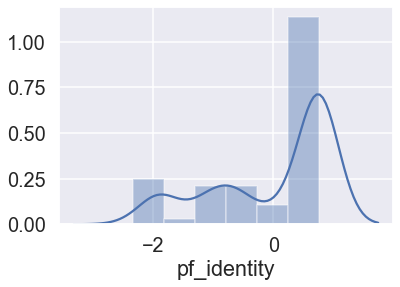

In [269]:
seaborn.distplot(normalized_latin_america)

In [270]:
# Normalizamos la distribucion
north_america = dataset[dataset.region == 'North America']['pf_identity'].dropna()

normalized_north_america=(north_america-north_america.mean())/north_america.std()

stats.kstest(normalized_north_america, 'norm')

KstestResult(statistic=0.46319111192950946, pvalue=0.00018919697809718092)

Al realizar el KS test para North America obtenemos un p-valor inferior al estadistico por lo que Rechazamos la Hipotesis Nula (que propone que se trataba de una distribucion Normal)

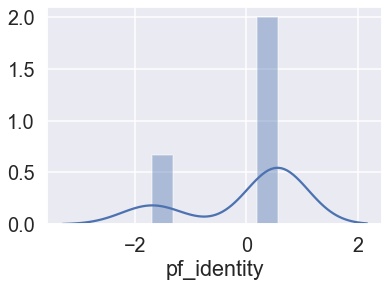

In [271]:
seaborn.distplot(normalized_north_america)

### KS test para PF_SCORE

En este caso **NO** podemos rechazar la Hipotesis Nula para Latin America y North America.

In [272]:
# Normalizamos la distribucion
latin_america = dataset[dataset.region == 'Latin America & the Caribbean']['pf_score'].dropna()

normalized_latin_america=(latin_america-latin_america.mean())/latin_america.std()

stats.kstest(normalized_latin_america, 'norm')

KstestResult(statistic=0.054270551553745605, pvalue=0.4221030427808178)

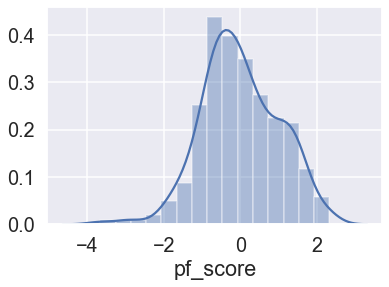

In [273]:
seaborn.distplot(normalized_latin_america)

In [274]:
# Normalizamos la distribucion
north_america = dataset[dataset.region == 'North America']['pf_score'].dropna()

normalized_north_america=(north_america-north_america.mean())/north_america.std()

stats.kstest(normalized_north_america, 'norm')

KstestResult(statistic=0.2077427985435053, pvalue=0.3103655336455261)

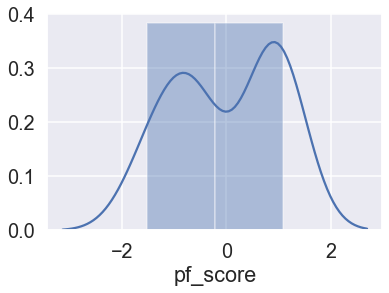

In [275]:
seaborn.distplot(normalized_north_america)

### KS test para EF_SCORE

En este caso Rechazamos la Hipotesis Nula para Latin America pero para North America no contamos con evidencia suficiente para rechazar la Hipotesis Nula.

In [276]:
# Normalizamos la distribucion
latin_america = dataset[dataset.region == 'Latin America & the Caribbean']['ef_score'].dropna()

normalized_latin_america=(latin_america-latin_america.mean())/latin_america.std()

stats.kstest(normalized_latin_america, 'norm')

KstestResult(statistic=0.13653982441091805, pvalue=0.00011737833201774813)

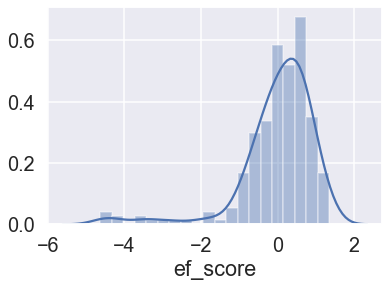

In [277]:
seaborn.distplot(normalized_latin_america)

In [278]:
# Normalizamos la distribucion
north_america = dataset[dataset.region == 'North America']['ef_score'].dropna()

normalized_north_america=(north_america-north_america.mean())/north_america.std()

stats.kstest(normalized_north_america, 'norm')

KstestResult(statistic=0.13215457740719216, pvalue=0.8759537837175628)

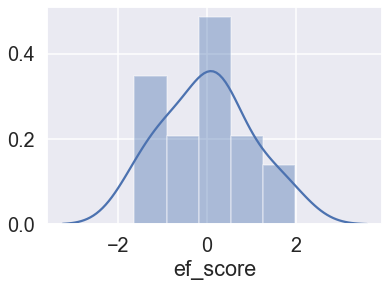

In [279]:
seaborn.distplot(normalized_north_america)

#### A nivel Global para la Variable PF_SCORE tampoco podemos rechazar la Hipotesis Nula. 

In [280]:
# Normalizamos la distribucion
world = dataset['pf_score'].dropna()

normalized_world=(world-world.mean())/world.std()

stats.kstest(normalized_world, 'norm')

KstestResult(statistic=0.07046101203546518, pvalue=4.297580535010432e-07)

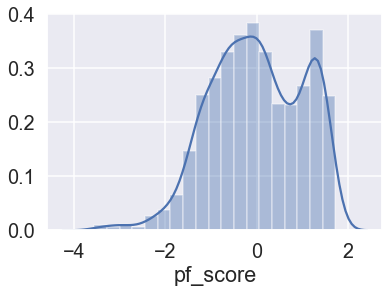

In [281]:
seaborn.distplot(normalized_world)

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

### Respuesta 4.3 - Coeficiente de Correlacion

Pearson 

Este coeficiente sólo debe utilizarse para comparar variables cuantitativas y continuas.

El valor del índice de correlación varía en el intervalo [-1,1]
Si este coeficiente es igual a 1 o -1 (o cercano a estos valores) significa que una variable es fruto de una transformación lineal de la otra. Teniendo una relación directa al tratarse de 1 (cuando una variable aumenta, la otra también), mientras que existirá una relación inversa al tratarse de -1 (cuando una variable aumenta la otra disminuye).
Mientras que, Si r = 0 (o cercano a este valor) no existe relación lineal, aunque puede existir algún otro tipo de relación no lineal.

In [282]:
dataset[['pf_score', 'ef_score']].corr(method="pearson")

,pf_score,ef_score
pf_score,1.000000,0.673663
ef_score,0.673663,1.000000


In [283]:
dataset[['pf_score', 'ef_score', 'pf_identity']].corr(method="spearman")

,pf_score,ef_score,pf_identity
pf_score,1.000000,0.710741,0.731358
ef_score,0.710741,1.000000,0.400777
pf_identity,0.731358,0.400777,1.000000


Observamos:

(con Pearson) Una correlacion Moderada entre las variables PF_SCORE y EF_SCORE

Como PF_IDENTITY es Discreta utilizamos con Spearman

Una correlacion significativa entre las variables PF_SCORE y PF_IDENTITY

Una correlacion Debil entre las variables EF_SCORE y PF_IDENTITY


En las graficas a continuacion podemos observar la correlacion Significativa entre las variables PF_SCORE y PF_IDENTITY, asi como tambien la Correlacion Debil entre las variables EF_SCORE y PF_IDENTITY.

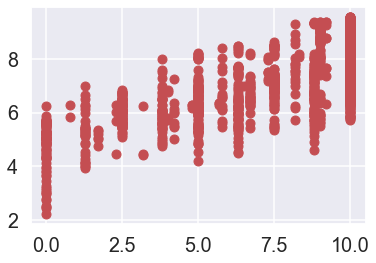

In [284]:
plt.plot(dataset['pf_identity'], dataset['pf_score'], "ro")

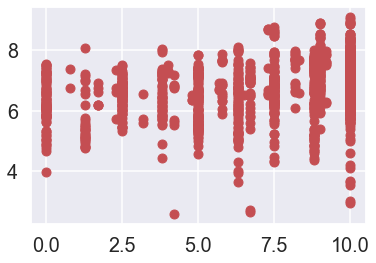

In [285]:
plt.plot(dataset['pf_identity'], dataset['ef_score'], "ro")